# BREAST CANCER CLASSIFICATION USING SUPPORT VECTOR MACHINES


## CONTEXT & PROBLEM STATEMENT


- Predicting if the cancer diagnosis is benign or malignant based on several observations/features
- 30 features are used, examples:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

- Datasets are linearly separable using all 30 input features
- Number of Instances: 569
- Class Distribution: 212 Malignant, 357 Benign
- Target class:
         - Malignant
         - Benign




DATA SOURCE: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

## STEP 0: IMPORTING LIBRARIES:

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
# import libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
import pickle

## STEP 1: LOADING THE DATA:

In [ ]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
print(cancer['target_names'])

['malignant' 'benign']


In [ ]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
cancer['data'].shape

(569, 30)

In [ ]:
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [ ]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## STEP 2: VISUALIZE THE DATA

### 2.1: Looking into the target variable:

<Axes: xlabel='target', ylabel='count'>

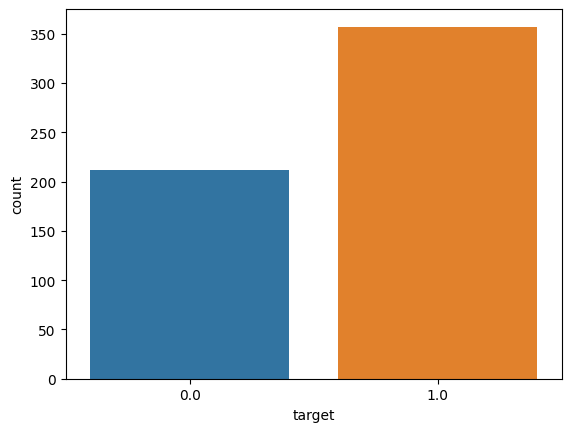

In [ ]:
sns.countplot(x=df_cancer['target'], label = "Count")

From this chart we can see that the dataset is inbalanced and has more begnin cases than malign ones. We will therefore have to balance the dataset. Which we will do when creating the SVM model we will set the following parameter:

```
class_weight='balanced'
```

The `class_weight='balanced'` parameter in SVM adjusts the importance of each class according to its frequency, giving higher weight to rarer classes. This helps in preventing the model from being biased towards the majority class and improves its performance on minority classes in imbalanced datasets.

<Axes: xlabel='mean area', ylabel='mean smoothness'>

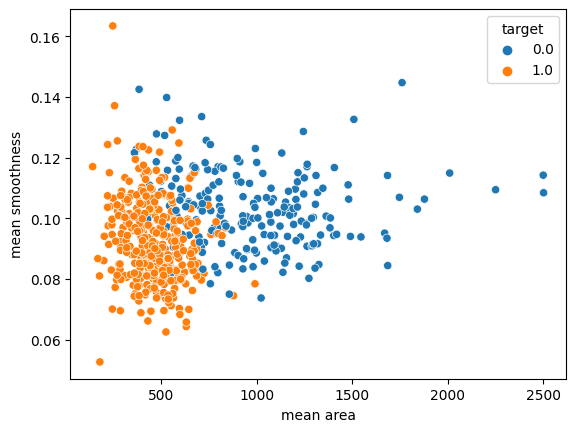

In [ ]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df_cancer)

Additionally wis this scatter plot we can see that whith malign cancer the variability of the mean smoothness and area is much higher than when we look at begnin cases.

### 2.2: Looking into the other features and their relation to the target variable:

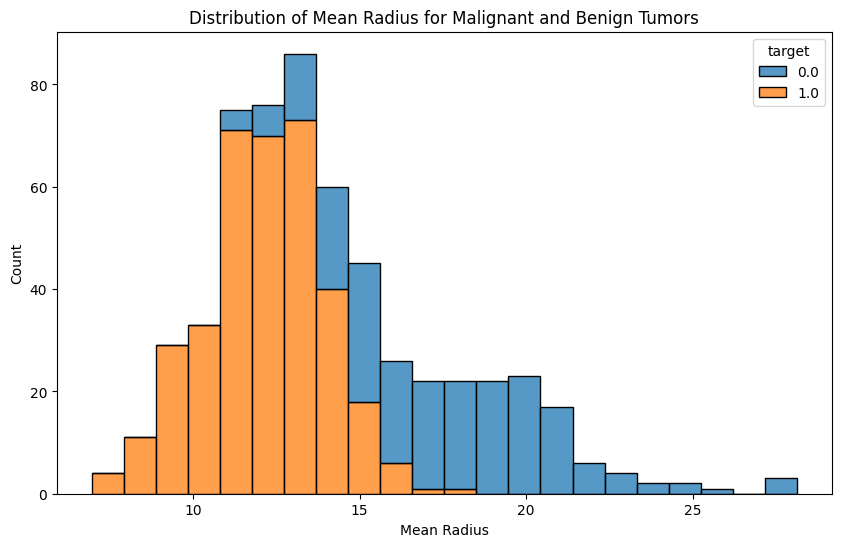

In [ ]:
#Distribution of mean radius with respect to the target
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cancer, x='mean radius', hue='target', multiple='stack')
plt.title('Distribution of Mean Radius for Malignant and Benign Tumors')
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.show()

The histogram shows the distribution of the mean radius size of the tumors, with a clear distinction between malignant and benign cases. Malignant tumors tend to have a larger mean radius than benign ones, which suggests that the size of a tumor could be an indicator of its severity.

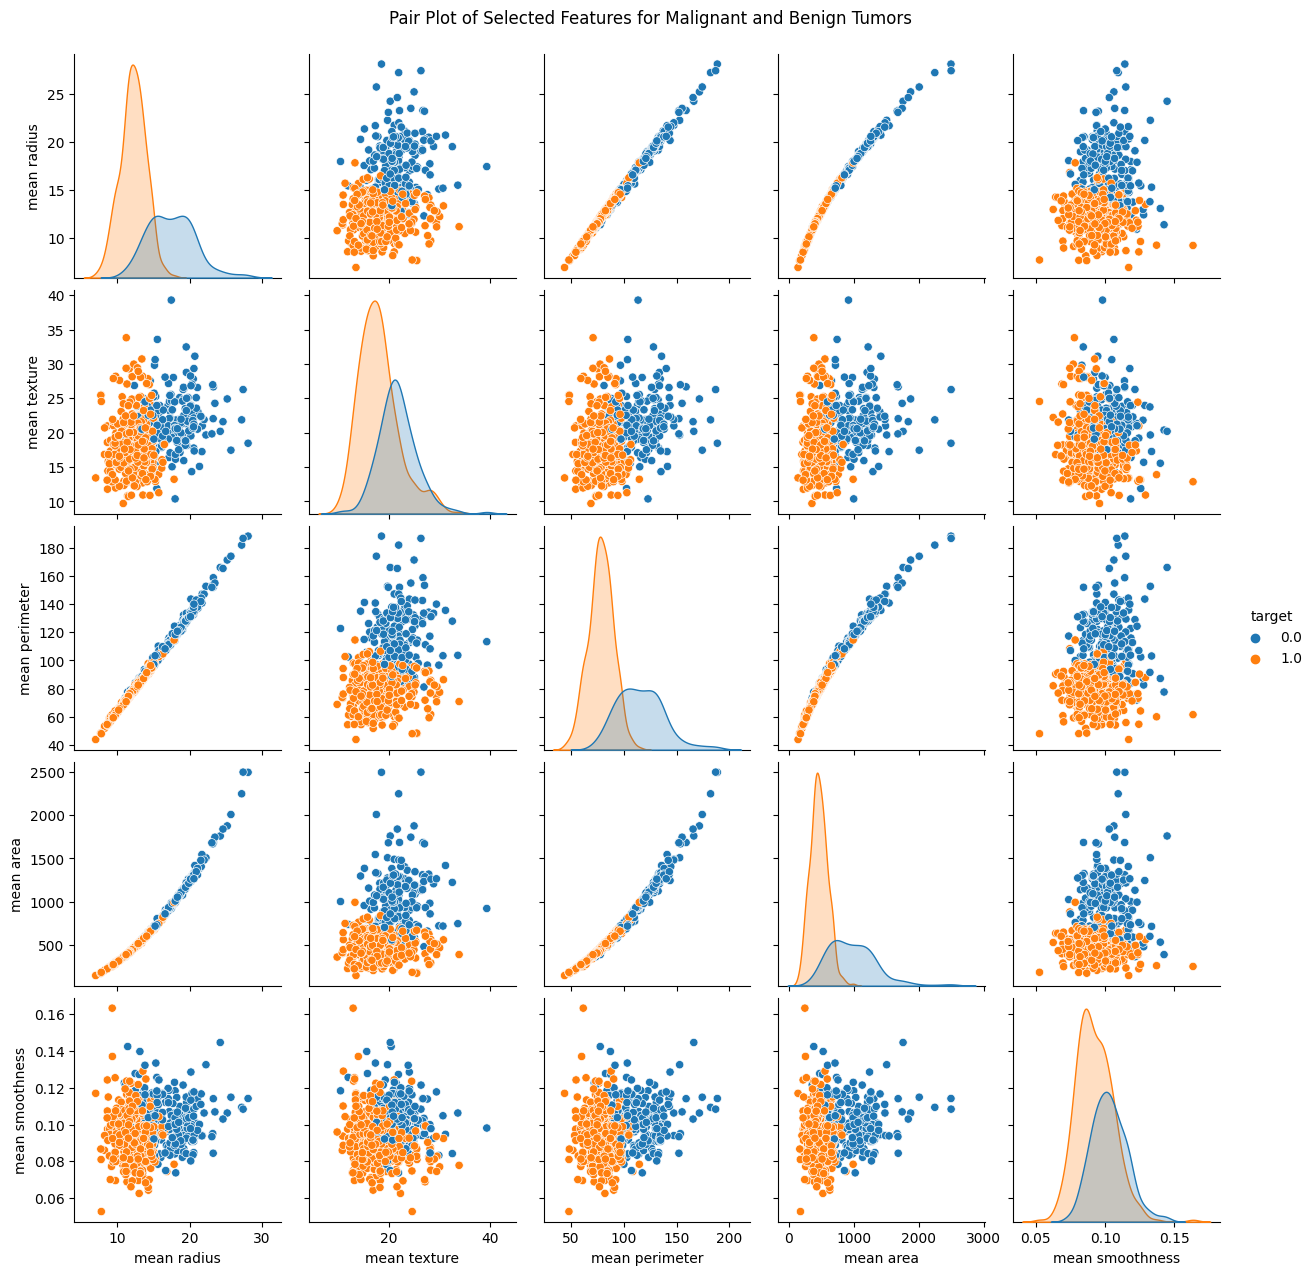

In [ ]:
#Pair plot of selected features
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
sns.pairplot(df_cancer[selected_features], hue='target')
plt.suptitle('Pair Plot of Selected Features for Malignant and Benign Tumors', y=1.02)
plt.show()


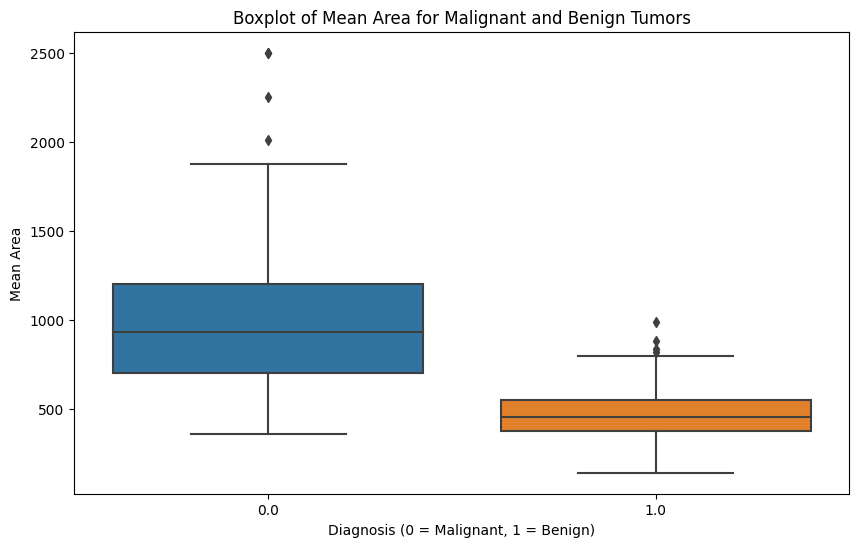

In [ ]:
#Boxplot of mean area by the target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='mean area', data=df_cancer)
plt.title('Boxplot of Mean Area for Malignant and Benign Tumors')
plt.xlabel('Diagnosis (0 = Malignant, 1 = Benign)')
plt.ylabel('Mean Area')
plt.show()

This boxplot compares the mean area of malignant and benign tumors. This plot shows us that typically, malignant tumors have a larger area, as indicated by the median and interquartile range being higher for malignant cases. Outliers may also be present, which could be extreme cases or data entry errors.

## STEP 3: EDA:

### 3.1: Checking for null values:

In [ ]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There are no missing values in our dataset.

### 3.2: Correlation Analysis:

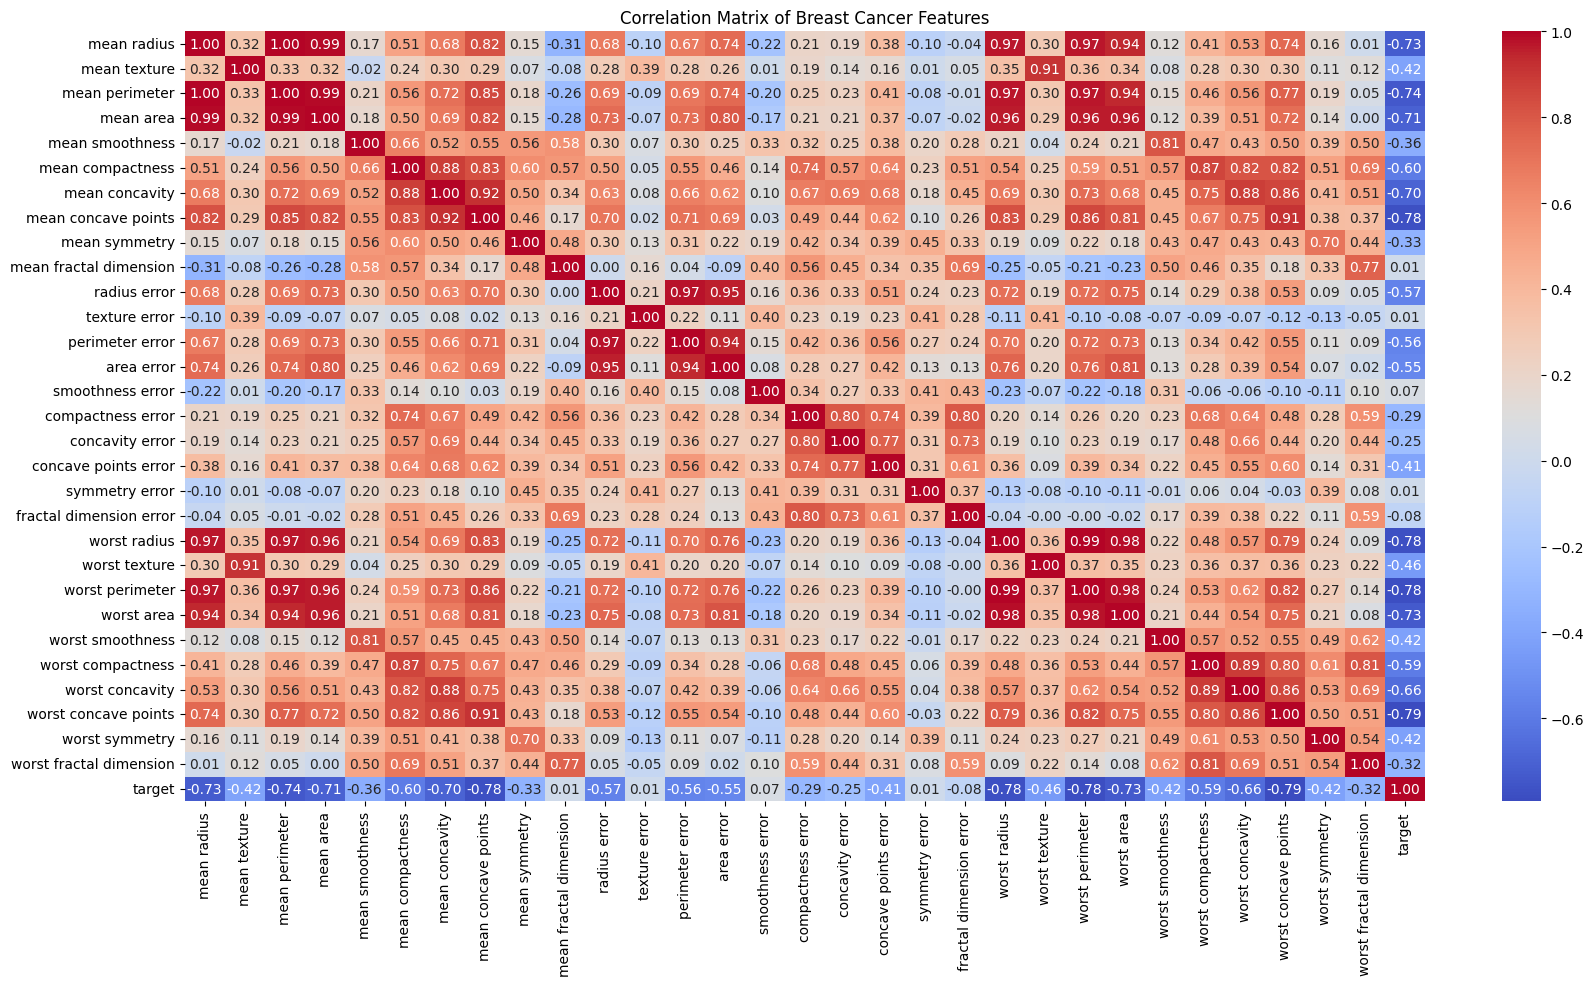

In [ ]:
#Heatmap of the correlation
plt.figure(figsize=(20, 10))
sns.heatmap(df_cancer.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Features')
plt.show()

Interpretation:    
The correlation matrix reveals that certain attributes exhibit minimal correlation with the outcome variable, suggesting their exclusion from consideration due to their likely limited predictive value. These attributes include *mean fractal dimension, texture error, symmetry error, smoothness error,* and *fractal dimension error*.

The examination of the correlation matrix suggests redundancy among certain variables that exhibit strong correlations, indicative of overlapping information. To prevent multicollinearity, which can skew model results, it is necessary to exclude some of these predictors.
  - For example, the attributes mean perimeter, mean area, and mean radius all share a high degree of correlation as they are measures related to the tumor's physical dimensions. However, mean perimeter offers a more comprehensive measure as it encompasses the entire outline of the tumor, which could potentially provide more insights than just the area or radius. Thus, we will retain mean perimeter and remove mean radius and mean area from the dataset.
  - In a similar vein, the features perimeter error, radius error, and area error demonstrate a strong correlation (with coefficients of 0.95, 1, and 0.94, respectively). Given that the perimeter error potentially reflects the variability of the tumor outline more effectively, we will opt to keep this feature and exclude radius error and area error.
  - Continuing in this fashion, worst perimeter, worst area, and worst radius are also highly correlated. Aligning with my earlier decision, we will preserve worst perimeter for its comprehensive representation of tumor size at its largest state and discard worst radius and worst area.
  - Lastly, although the correlation is somewhat lower, mean concavity, mean concave points, and mean compactness are considerably correlated (with coefficients of 0.86, 0.82, and 0.91). Given that mean concavity effectively measures the severity of tumor indentations, it may serve as a superior indicator of malignancy. Therefore, we will exclude mean compactness and mean concave points in favor of mean concavity.

### 3.3: Data Cleaning:
We will drop the variables that were in the correlation analysis.

In [ ]:
# Dropping the specified features from the dataframe
columns_to_drop = [
    'mean fractal dimension', 'texture error', 'symmetry error', 'smoothness error',
    'fractal dimension error', 'mean radius', 'mean area', 'radius error', 'area error',
    'worst radius', 'worst area', 'mean compactness', 'mean concave points']

df_cancer_new = df_cancer.drop(columns=columns_to_drop)

## STEP 4: TRAIN/TEST SPLIT & MODEL TRAINING

### 4.1: Splitting the data:

In [ ]:
# Let's drop the target label coloumns
X = df_cancer_new.drop(['target'],axis=1)

In [ ]:
y = df_cancer_new['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [ ]:
X_train.shape

(455, 17)

In [ ]:
X_test.shape

(114, 17)

In [ ]:
y_train.shape

(455,)

In [ ]:
y_test.shape

(114,)

### 4.2: Standardizing the data:

In [ ]:
# Standardize the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5: Create an SVM model and do Hyperparameter Tuning:

In [ ]:
# Define the parameter space for hyperparameter tuning
param_space = {
    'C': (1e-6, 1e+6, 'log-uniform'),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': (1, 5),  # Degree for the 'poly' kernel
    'gamma': (1e-6, 1e+1, 'log-uniform'),  # Kernel coefficient
}

In [ ]:
# Create a Bayesian Optimization object
opt = BayesSearchCV(SVC(class_weight='balanced'), param_space, n_iter=32, cv=5, n_jobs=-1)

In [ ]:
# Fit the model to the training data with hyperparameter tuning
opt.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=32,
              n_jobs=-1,
              search_spaces={'C': (1e-06, 1000000.0, 'log-uniform'),
                             'degree': (1, 5),
                             'gamma': (1e-06, 10.0, 'log-uniform'),
                             'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Get the best model with hyperparameters
best_model = opt.best_estimator_

In [ ]:
best_model

SVC(C=9.90796565525952, class_weight='balanced', degree=1,
    gamma=1.8686299721045546e-05, kernel='linear')

## STEP 6: EVALUATING THE MODEL

In [ ]:
# Make predictions on the test set
y_predict = best_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        48
         1.0       0.97      1.00      0.99        66

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



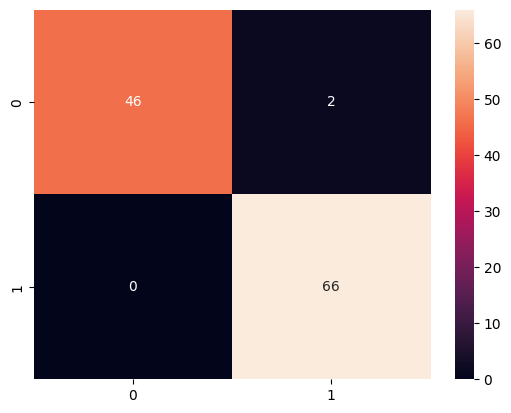

In [ ]:
# Evaluate the model
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

The interpretation of the model's performance metrics is as follows:
- **Precision**: This metric tells you what proportion of positive identifications was actually correct. For class 0.0, the model has a precision of 1.00, meaning it correctly identified all cases without any false positives. For class 1.0, the precision is 0.97, which means that 97% of the time it predicted class 1.0, it was correct.
- **Recall**: This metric tells you what proportion of actual positives was identified correctly. For class 0.0, the recall is 0.96, indicating that the model identified 96% of all actual class 0.0 cases. For class 1.0, the recall is 1.00, meaning the model identified all actual class 1.0 cases.
- **F1-Score**: This is the harmonic mean of precision and recall and is a single metric that combines both precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. For class 0.0, the F1 score is 0.98, and for class 1.0, it is 0.99, indicating very good performance for both classes.
- **Support**: This number indicates how many instances of the true class are in the dataset. There were 48 instances of class 0.0 and 66 instances of class 1.0 in the test set.
- **Accuracy**: This is the proportion of true results among the total number of cases examined. The model has an accuracy of 0.98, meaning it correctly identified 98% of all cases.
- **Macro Avg**: This is the average precision, recall, and F1 score between classes. The macro average gives equal weight to both classes. If the dataset is balanced (similar numbers of instances for each class), this is a good measure of the overall performance of the model. The macro average for precision, recall, and F1 score is 0.99, 0.98, and 0.98 respectively, which indicates high performance across both classes.
- **Weighted Avg**: This is the average precision, recall, and F1 score between classes weighted by the support for each class. This metric accounts for class imbalance; it calculates metrics for each class separately and averages them, weighted by the number of instances in each class. The weighted average for precision, recall, and F1 score is 0.98, which, like the macro average, indicates high performance across both classes.

The confusion matrix shows the actual vs. predicted classifications.
  - (0,0) = 46: True negatives - the number of times the model correctly predicted class 0.0.
  - (0,1) = 2: False positives - the number of times the model incorrectly predicted class 1.0 when it was actually class 0.0.
  - (1,0) = 0: False negatives - the model made no errors by predicting class 0.0 when it was actually class 1.0.
  - (1,1) = 66: True positives - the number of times the model correctly predicted class 1.0.

### **Conclusion**
Overall, the model shows excellent performance with high precision, recall, and F1 scores, and a very high overall accuracy of 98%. It seems particularly effective in identifying class 1.0 with no false negatives, which can be crucial depending on the application (for example, in medical diagnostics, where a false negative can be very costly).

## Exporting in pickle

In [ ]:
import pickle

filename = 'SVM_cancer.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [ ]:
# Save the scaler to a file
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(sc, scaler_file)